In [12]:
##Linear Regression Model

In [11]:
# Step 1
# import the libraries and dataset eg:pandas

# Step 2
# preprocessing and modeling
# a) train_test_split
# b) labelEncoder
# c) standardscaler: scales features for better model performance
# d) counterVectorizer: connects text data into numeric vectors
# e) metrics: offers tools for eveluating model accuracy

# Advanced modelling
# xgboost: a high performance gradient boosting algo used for predictions

# Utility
# warnings.filterwarning("ignore"): hides unnecessary warning messages for clear output

#the main aim is to develop a machine learning model using linear regression accurately to predict the box office of the movies based on the various available features
#the model will be trained on a dataset contained on the dataset

#specific objectives:
#1. Build a predictive model that can estimate the expected revenue of the movie
#2. provide insights into the factors that influence the box office success
#3. compare linear regression performance with other advanced models

In [1]:
import numpy as np  #type:ignore
import pandas as pd #type:ignore
import matplotlib.pyplot as plt  #type:ignore
import seaborn as sns  #type:ignore
from sklearn.model_selection import train_test_split  #type:ignore
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder #type:ignore
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LinearRegression #type:ignore
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #type:ignore
from xgboost import XGBRegressor  #type:ignore
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')


In [2]:
#import the csv file
df = pd.read_csv('Walmart_Sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.isnull()
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
#round off
df['CPI'] = df['CPI'].round(1)
df['Unemployment'] = df['Unemployment'].round(1)

In [5]:
df['Unemployment'].head()

0    8.1
1    8.1
2    8.1
3    8.1
4    8.1
Name: Unemployment, dtype: float64

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.1,8.1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.2,8.1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.3,8.1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.3,8.1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.4,8.1


In [7]:

#handling date 
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [8]:
df['Day'] = df['Date'].dt.day_name()
df['Day'].unique()

array(['Friday'], dtype=object)

In [9]:
df = df.drop(['Date'], axis=1)


In [10]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578959,8.000746
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.357125,1.875256
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.100000,3.900000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.700000,6.900000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.600000,7.900000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.700000,8.600000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.200000,14.300000


In [11]:
df['Unemployment'] = df['Unemployment'].round()

In [156]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,1643690.90,0,42.31,2.572,211.1,8.0,Friday
1,1,1641957.44,1,38.51,2.548,211.2,8.0,Friday
2,1,1611968.17,0,39.93,2.514,211.3,8.0,Friday
3,1,1409727.59,0,46.63,2.561,211.3,8.0,Friday
4,1,1554806.68,0,46.50,2.625,211.4,8.0,Friday


In [12]:
df['Day'] = df['Day'].replace('Friday', '1')
df['Day'].astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
6430    1
6431    1
6432    1
6433    1
6434    1
Name: Day, Length: 6435, dtype: int64

In [13]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,1643690.90,0,42.31,2.572,211.1,8.0,1
1,1,1641957.44,1,38.51,2.548,211.2,8.0,1
2,1,1611968.17,0,39.93,2.514,211.3,8.0,1
3,1,1409727.59,0,46.63,2.561,211.3,8.0,1
4,1,1554806.68,0,46.50,2.625,211.4,8.0,1


In [14]:
#define features and targets
X = df.drop('Weekly_Sales', axis=1)
y =df['Weekly_Sales']

In [15]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [16]:
#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[-1.16466588 -0.26842748  0.8057783  ...  1.10431829 -1.03105892
   0.        ]
 [-1.24165623 -0.26842748 -2.15108453 ...  0.52358155  0.53607758
   0.        ]
 [ 1.45300579 -0.26842748  0.04355515 ... -1.14731009  0.53607758
   0.        ]
 ...
 [ 1.06805407 -0.26842748  1.42237786 ...  1.08903574  0.01369875
   0.        ]
 [ 1.14504441  3.72540101 -0.85508863 ... -1.05561482  2.62559292
   0.        ]
 [-1.24165623 -0.26842748 -1.79487513 ...  0.45735719  0.53607758
   0.        ]]


In [17]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578959,7.976535
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.357125,1.914778
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.100000,4.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.700000,7.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.600000,8.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.700000,9.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.200000,14.000000


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
y_pred = model.predict(X_test_scaled)

In [34]:
mse = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"Root Mean Squared Error: {rmse: .2f}")
print(f"R squared: {r2: .2f}")

Mean Squared Error:  77326.89
Root Mean Squared Error:  278.08
R squared:  0.93


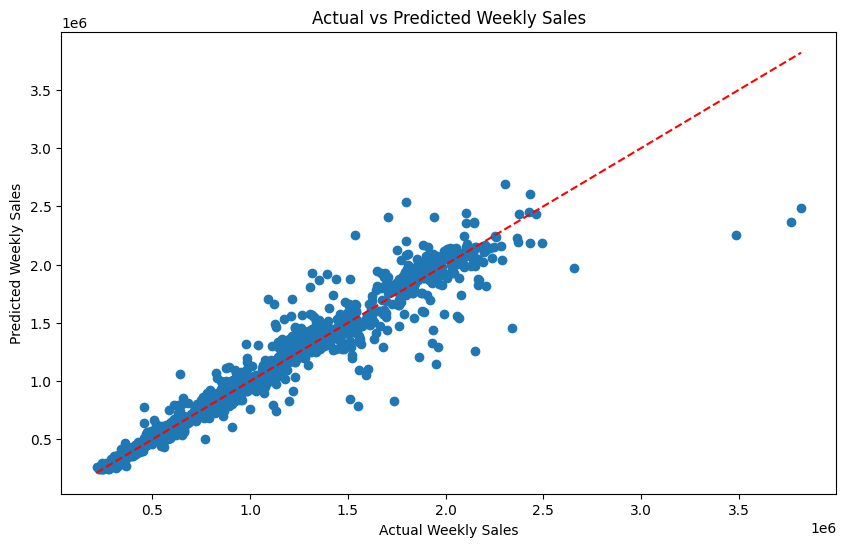

In [35]:
#plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.show()